In [2]:
# Initiate: import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import random
import sys
import logging
logging.disable(sys.maxsize)

pd.set_option('display.max_columns', None)

### Dataset 

In [3]:
# Assume x are samples from a normal distribution with mean 10, std 10
# f(x) = x^2 + e^(x) + ln((x+5) / x) + random_error

In [33]:
random.seed(66)

N = 1000
mu = 10
sigma = 10

x = np.random.normal(mu, sigma, size=N)
y = 3*x*x*x + 2*x*x  + np.random.normal(0,1,size=N)

Text(0,0.5,'y')

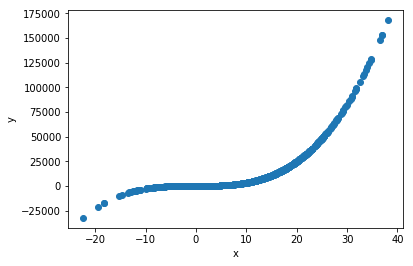

In [34]:
plt.scatter(x, y)
plt.xlabel("x")
plt.ylabel("y")

### Variance of sample mean x

In [35]:
random.seed(88)

# plot the empirical distribution of x_bar
sim = 10000
N = 1000
mu = 10
sigma = 10
x_bars = []

for i in range(sim):
    x = np.random.normal(mu, sigma, size=N)
    y = 3*x*x*x + 2*x*x  + np.random.normal(0,1,size=N)
    x_bars.append(np.mean(y))


12413.824527677269
744.9949220954676


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


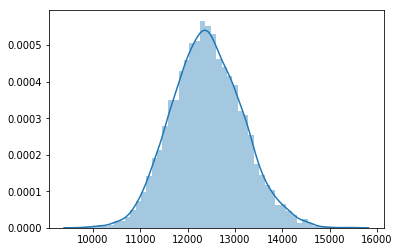

In [36]:
sns.distplot(np.array(x_bars))
print(np.mean(x_bars))
print(np.std(x_bars))

### Variance of the antithetic sampling

In [37]:
random.seed(88)

# plot the empirical distribution of x_bar
sim = 10000
N = 500
mu = 10
sigma = 10
x_bars_antithetic = []

for i in range(sim):
    x = np.random.normal(mu, sigma, size=N)
    x_tilt = 2*mu - x
    y = 3*x*x*x + 2*x*x + np.random.normal(0,1,size=N)
    y_tilt = 3*x_tilt*x_tilt*x_tilt + 2*x_tilt*x_tilt + np.random.normal(0,1,size=N)
    x_bars_antithetic.append((np.sum(y) + np.sum(y_tilt))/(2*N))

12398.139798573857
577.7878640500811


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


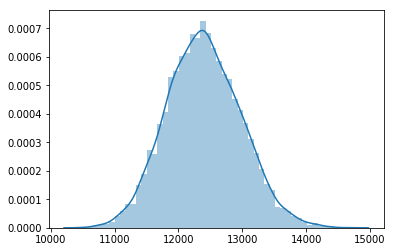

In [38]:
sns.distplot(np.array(x_bars_antithetic))
print(np.mean(x_bars_antithetic))
print(np.std(x_bars_antithetic))

### Compare two variance estimations

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


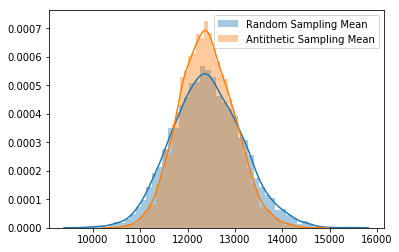

In [39]:
sns.distplot(np.array(x_bars))
sns.distplot(np.array(x_bars_antithetic))
plt.legend(labels=['Random Sampling Mean','Antithetic Sampling Mean'])

In [40]:
### Apparently, Antithetic sampling achieve smaller variances

### Pho estimation

In [45]:
mu = 10
sigma = 10
N = 1000
x = np.random.normal(mu, sigma, size=N)
x_tilt = 2*mu - x
y = 3*x*x*x + 2*x*x + np.random.normal(0,1,size=N)
y_tilt = 3*x_tilt*x_tilt*x_tilt + 2*x_tilt*x_tilt  + np.random.normal(0,1,size=N)

In [46]:
1 + np.corrcoef(y, y_tilt)[0][1]

0.5944415170907751

In [47]:
# from the simulation, we reduce the variance by 38%
(577*577) / (745*745)

0.5998450520246835

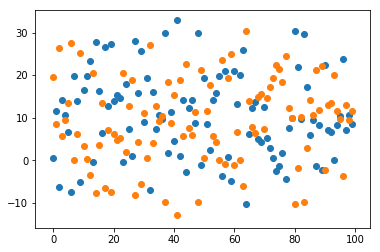

In [63]:
# x_tilt is the symmetric point with respect the center 10
plt.scatter(np.arange(100), x[:100])
plt.scatter(np.arange(100), x_tilt[:100])